In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_excel('heart-dataset.xlsx')
df = data.copy()

In [25]:
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [18]:
df.columns = ['age','sexe','type_douleur_thoracique','pression_artérielle','cholesterol','glycémie_a_jeun','résultats_electrocardiogramme','fréquence_cardiaque_maximale','angine','depression','pente_du_segment_ST_exercice','presence_maladie_cardiaque']
df.head()

,age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            918 non-null    int64  
 1   sexe                           918 non-null    object 
 2   type_douleur_thoracique        918 non-null    object 
 3   pression_artérielle            918 non-null    int64  
 4   cholesterol                    918 non-null    int64  
 5   glycémie_a_jeun                918 non-null    int64  
 6   résultats_electrocardiogramme  918 non-null    object 
 7   fréquence_cardiaque_maximale   918 non-null    int64  
 8   angine                         918 non-null    object 
 9   depression                     918 non-null    float64
 10  pente_du_segment_ST_exercice   918 non-null    object 
 11  presence_maladie_cardiaque     918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 8

In [23]:
df_target = df.groupby("presence_maladie_cardiaque").size()
df_target

presence_maladie_cardiaque
0    410
1    508
dtype: int64

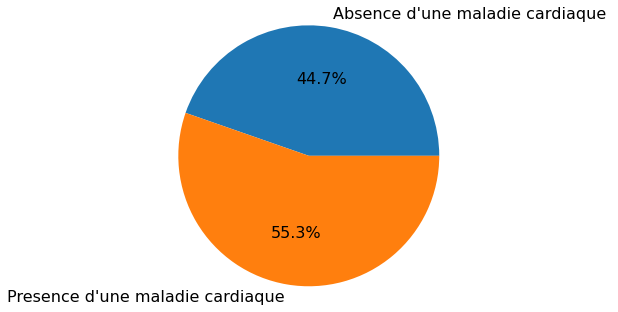

In [24]:
plt.pie(df_target.values, labels = ["Absence d'une maladie cardiaque ", "Presence d'une maladie cardiaque"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

In [27]:
df_sex = df.groupby(["sexe","presence_maladie_cardiaque"]).size()
df_sex

sexe   presence_maladie_cardiaque
femme  0                             143
       1                              50
homme  0                             267
       1                             458
dtype: int64

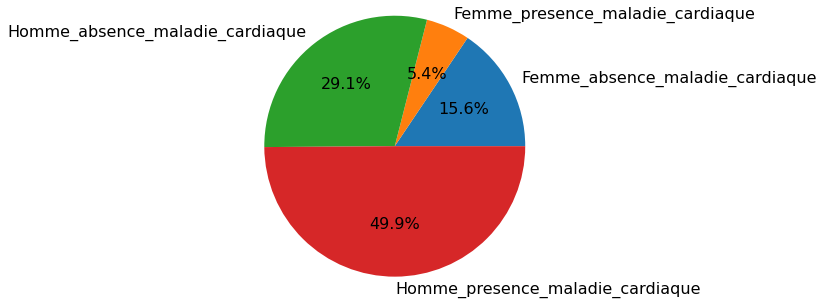

In [29]:
plt.pie(df_sex.values, labels = ["Femme_absence_maladie_cardiaque", "Femme_presence_maladie_cardiaque", "Homme_absence_maladie_cardiaque", "Homme_presence_maladie_cardiaque"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

In [30]:
def classe_age(x):
    if x < 25:
        tranche_age = "< 25"
    elif  25 <= x < 30:
        tranche_age = "25-30"
    elif 30 <= x < 35:
        tranche_age = "30-35"
    elif 35 <= x < 40:
        tranche_age = "35-40"
    elif 40 <= x < 45:
        tranche_age = "40-45"
    elif 45 <= x < 50:
        tranche_age = "45-50"
    elif 50 <= x < 55:
        tranche_age = "50-55"
    elif 55 <= x < 60:
        tranche_age = "55-60"
    elif 60 <= x < 65:
        tranche_age = "60-65"
    else:
        tranche_age = " > 65"
    return tranche_age

In [32]:
df.insert(df.columns.get_loc('age')+1, 'tranche_age', df['age'].map(classe_age))

In [33]:
df.head()

,age,tranche_age,sexe,type_douleur_thoracique,pression_artérielle,cholesterol,glycémie_a_jeun,résultats_electrocardiogramme,fréquence_cardiaque_maximale,angine,depression,pente_du_segment_ST_exercice,presence_maladie_cardiaque
0,40,40-45,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,45-50,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,35-40,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,45-50,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,50-55,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


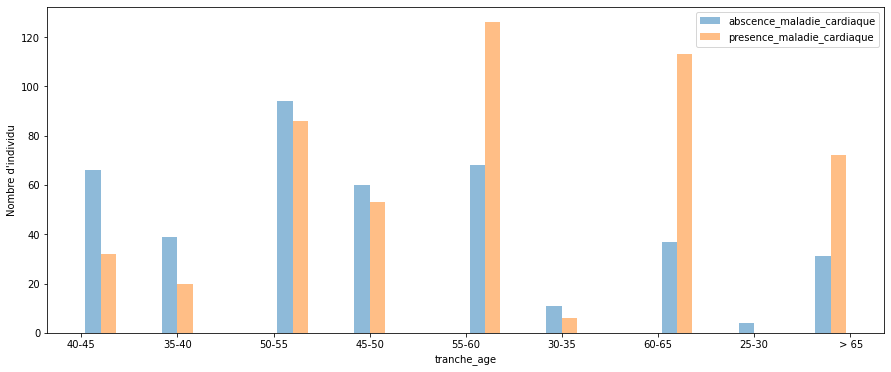

In [38]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].tranche_age, df[df.presence_maladie_cardiaque==1].tranche_age], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("tranche_age")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

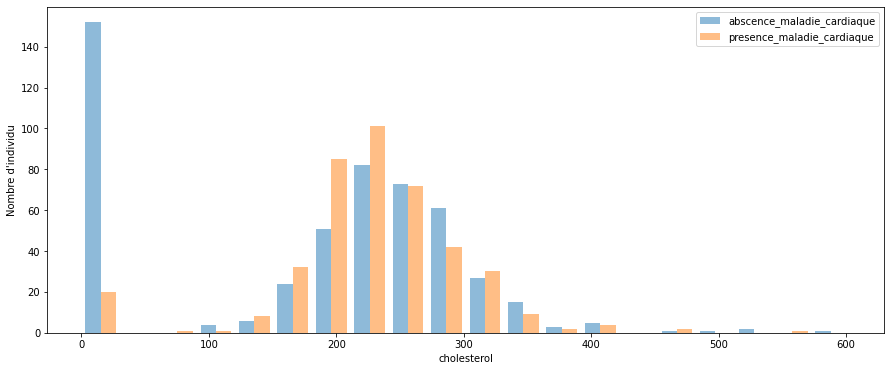

In [43]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==1].cholesterol, df[df.presence_maladie_cardiaque==0].cholesterol], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("cholesterol")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

In [44]:
df.columns

Index(['age', 'tranche_age', 'sexe', 'type_douleur_thoracique',
       'pression_artérielle', 'cholesterol', 'glycémie_a_jeun',
       'résultats_electrocardiogramme', 'fréquence_cardiaque_maximale',
       'angine', 'depression', 'pente_du_segment_ST_exercice',
       'presence_maladie_cardiaque'],
      dtype='object')

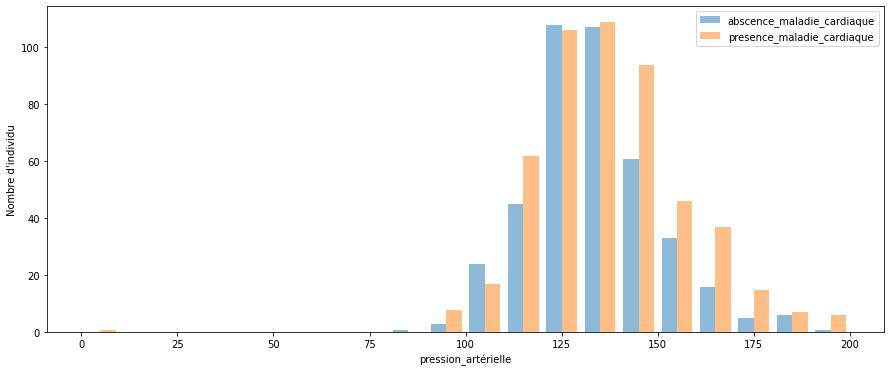

In [45]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].pression_artérielle, df[df.presence_maladie_cardiaque==1].pression_artérielle], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("pression_artérielle")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

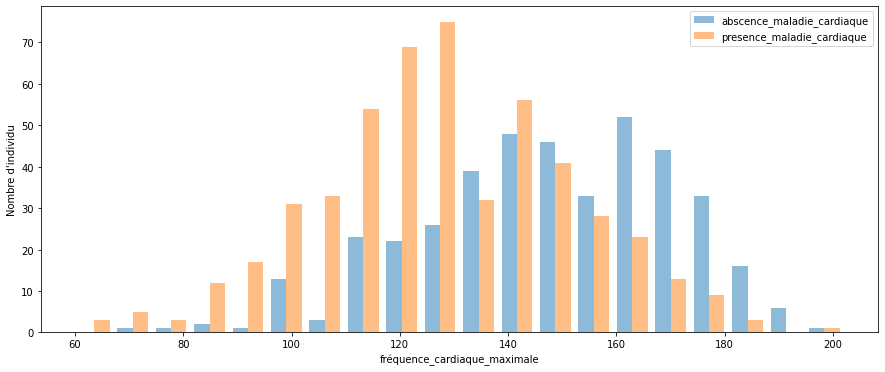

In [48]:
plt.figure(figsize=(15, 6))
plt.hist([df[df.presence_maladie_cardiaque==0].fréquence_cardiaque_maximale, df[df.presence_maladie_cardiaque==1].fréquence_cardiaque_maximale], bins = 20, alpha = 0.5, label = ["abscence_maladie_cardiaque","presence_maladie_cardiaque"])
plt.xlabel("fréquence_cardiaque_maximale")
plt.ylabel("Nombre d'individu")
plt.legend()
plt.show()

# Mission: Analyse Exploratoire du dataset Heat
## Problème: Prédire la présence d'une maladie cardiaque ou non

**Analyse de la forme** 
- Le dataset contient 918 individus (lignes) et 12 variables (colonnes)
- De plus nous avons 5 variables **quantitatives** (age, pression_artérielle, cholesterol, fréquence_cardiaque_maximale, depression
- Et 7 variables **qualitatives** dont la variable cible (sexe, type_douleur_thoracique, glycémie_a_jeun,résultats_electrocardiogramme, angine, pente_du_segment_ST_exercice, presence_maladie_cardiaque)
- Certaines variables ont **été recodé** (notamment: presence_maladie_cardiaque)
- Il n'y a pas de valeurs manquantes dans notre dataset


**Analyse de Fond**
- Nous constatons qu'il y a **55.3%** d'individu qui présente une maladie cardiaque contre **44.7%** d'individu qui n'en présente pas
- la maladie cardiaque touche plus les Hommes **49.9%** environ *50%* que les femmes avec **5.4%**
- A partir des ages, nous construisons des classes d'ages pour mieux classifier les individus et cibler la classe la plus touchée par la maladie
- Les individus **les plus touchés** par la maladie cardiaque ont leur age compris entre **55 et 60 ans** et **les moins touchés** ont leur age compris entre **25 et 30 ans**. Donc on peut dire que la maladie cardiaque **touche** les **plus agées** que les **plus** **jeunes**
- En outre, les quantités de personnes souffrant de maladies cardiaques dépassent **200 mg/dl de chol**. Selon la recherche, la valeur normale du chol devrait être inférieure à 200 mg/dl. 
- La tension artérielle idéale doit être inférieure à 120 mmHg. Que les patients aient une maladie cardiaque ou non, plus de 50 % des patients ont une pression artérielle plus élevée. 
- La fréquence cardiaque maximale (FCMT = 220 - AgeMoyen) est négativement liée à l'âge.  Il semble que la moyenne des patients atteints d'une maladie cardiaque soit plus élevée. Ainsi plus l'individu a un age élévé (donc atteint de maladie cardiaque) l'age est élévé moins sera la fréquence cardiaque maximale et inversement